### Import needed packages to be used throughout the project
Importing the libraries required to characterise and visualise the data

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns


Reading the file containing our dataset and storing it in a variable

In [62]:
apsfailureset_df = pd.read_csv("apsfailureset.csv")

To get a sense of how the dataset looks like, we use head() \
Gives us the first 5 rows and the total number of columns

In [63]:
apsfailureset_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


Using tail() allows us to see the last 5 rows and how data may look like

In [64]:
apsfailureset_df.tail()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0
59999,neg,40222,na,698,628,0,0,0,0,0,...,440066,183200,344546,254068,225148,158304,170384,158,0,0


Shape function helps us know the total number of rows and columns

In [65]:
apsfailureset_df.shape

(60000, 171)

Using info provides us with a summary of the information about our dataset. \
Some of this useful information include the rows, the columns, data types and memory usage of the dataframe

In [66]:
apsfailureset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


The df.describe() function in pandas generates descriptive statistics of our dataset \
This is useful information for us to get an initial idea of some of the useful values \
Values such as the mean, the minimum and the maximum.

In [67]:
apsfailureset_df.describe

<bound method NDFrame.describe of       class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg   76698     na  2130706438    280      0      0      0      0   
1       neg   33058     na           0     na      0      0      0      0   
2       neg   41040     na         228    100      0      0      0      0   
3       neg      12      0          70     66      0     10      0      0   
4       neg   60874     na        1368    458      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
59995   neg  153002     na         664    186      0      0      0      0   
59996   neg    2286     na  2130706538    224      0      0      0      0   
59997   neg     112      0  2130706432     18      0      0      0      0   
59998   neg   80292     na  2130706432    494      0      0      0      0   
59999   neg   40222     na         698    628      0      0      0      0   

      ag_002  ...   ee_002  ee_003   ee_0

Checking to see missing data in the dataset, but we see na is a text value instead of actual null value


In [68]:
apsfailureset_df.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

### Replace na with NaN
This will allow us to drop the Null cells and only use the data that is reliable

In [69]:
apsfailureset_df.replace('na', np.nan, inplace=True)
apsfailureset_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,NaN,0,NaN,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,NaN,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,NaN,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,NaN,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,NaN,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,NaN,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


Now we check again and count the null values in each column

In [70]:
apsfailureset_df.isnull().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

Removing the columns that have the most NaNs that affect the rest of the dataset \
for example, from the above printed dataset, we can see column ab_000 has 46329 na values which contributes to most of the NA values in the dataset \
If we use, dropna() now, then it will drop the whole row, when there is one or two columns contributing to most null values

1. Establish our dataset threshold

In [71]:
threshold = len(apsfailureset_df) / 3
threshold

20000.0

2. As we established, some columns have way more null values than other columns \
let's get a count of the null values for each column


In [72]:
null_counts = apsfailureset_df.isnull().sum()
null_counts

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

3. Now we filter out the columns that have more null values than the threshold we established \
This gave us the list of column names with null values higher than the threshold


In [73]:
cols_with_many_nulls = null_counts[null_counts > threshold].index.tolist()

cols_with_many_nulls

['ab_000',
 'bk_000',
 'bl_000',
 'bm_000',
 'bn_000',
 'bo_000',
 'bp_000',
 'bq_000',
 'br_000',
 'cr_000']

4. Now we can drop the columns that have more null values than our threshold \
Once the columns are dropped, we can notice the new shape of the dataset \
We now notice that 10 columns have been dropped

In [74]:
aps_df = apsfailureset_df.drop(columns=cols_with_many_nulls)
aps_df.shape

(60000, 161)

5. Now, we drop rows that have NaN cells as this will clean our data set further \
This will provide us with cleaner data that we can rely on in our analysis \
Moving forward, this is the dataset that will be used for visualisations and PCA later on

In [75]:
aps_df_cleaned = aps_df.dropna(axis=0)
aps_df_cleaned

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2130706438,280,0,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
2,neg,41040,228,100,0,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,70,66,0,10,0,0,0,318,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,1368,458,0,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
5,neg,38312,2130706432,218,0,0,0,0,0,0,...,388574,288278,900430,300412,1534,338,856,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,664,186,0,0,0,0,0,2564,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,2130706538,224,0,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,2130706432,18,0,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,2130706432,494,0,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


This is to find the number of duplicates

In [76]:
aps_df_cleaned.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        False
2        False
3        False
4        False
5        False
         ...  
59995    False
59996    False
59997    False
59998    False
59999    False
Length: 41661, dtype: bool>

Next step, we drop the class column to get a copy of the dataset that is purely numerical and has no text values

In [77]:
aps_df_cleaned_no_class = aps_df_cleaned.drop(columns=['class'])
aps_df_cleaned_no_class

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,2130706438,280,0,0,0,0,0,0,37250,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
2,41040,228,100,0,0,0,0,0,0,1648,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,12,70,66,0,10,0,0,0,318,2212,...,240,46,58,44,10,0,0,0,4,32
4,60874,1368,458,0,0,0,0,0,0,43752,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
5,38312,2130706432,218,0,0,0,0,0,0,9128,...,388574,288278,900430,300412,1534,338,856,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002,664,186,0,0,0,0,0,2564,59100,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,2286,2130706538,224,0,0,0,0,0,0,104,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,112,2130706432,18,0,0,0,0,0,0,28,...,792,386,452,144,146,2622,0,0,0,0
59998,80292,2130706432,494,0,0,0,0,0,0,330,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


We want to check if there are duplicate values in the dataset and if there is any, that we drop

In [78]:
x = aps_df_cleaned_no_class.drop_duplicates()
before_duplicates = x.shape[0]
after_duplicates = x.shape[0]
duplicates_removed = before_duplicates - after_duplicates
print(f"Number of Duplicates removed: {duplicates_removed}")

Number of Duplicates removed: 0


### EDA Visualizations
1. Histogram: With this diagram we visualise the aa_000 column to see the data points

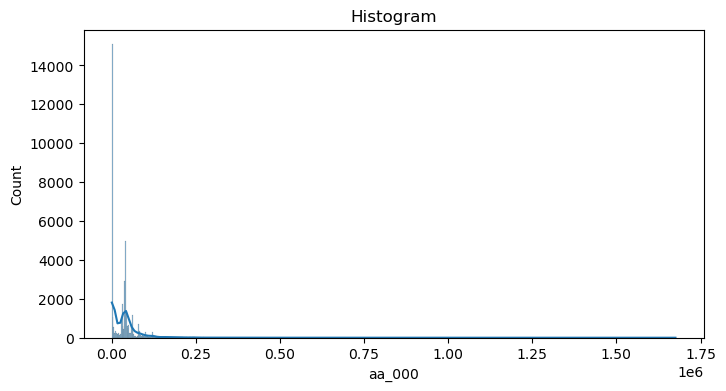

In [80]:
plt.figure(figsize=(8, 4))
sns.histplot(data=aps_df_cleaned, x='aa_000', kde=True)
plt.title('Histogram')
plt.show()

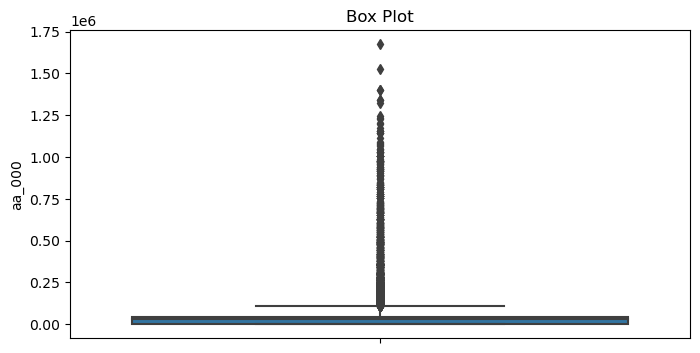

In [51]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=aps_df_cleaned, y='aa_000')
plt.title('Box Plot')
plt.show()


## Histogram reading
This visualization shows us that the failures for components not related to the APS are much larger than failures for a specific component of the APS system. \
Histograms showing data visualisation for column aa_000 vs class \
This visualisation compares data in one column when class is pos or neg

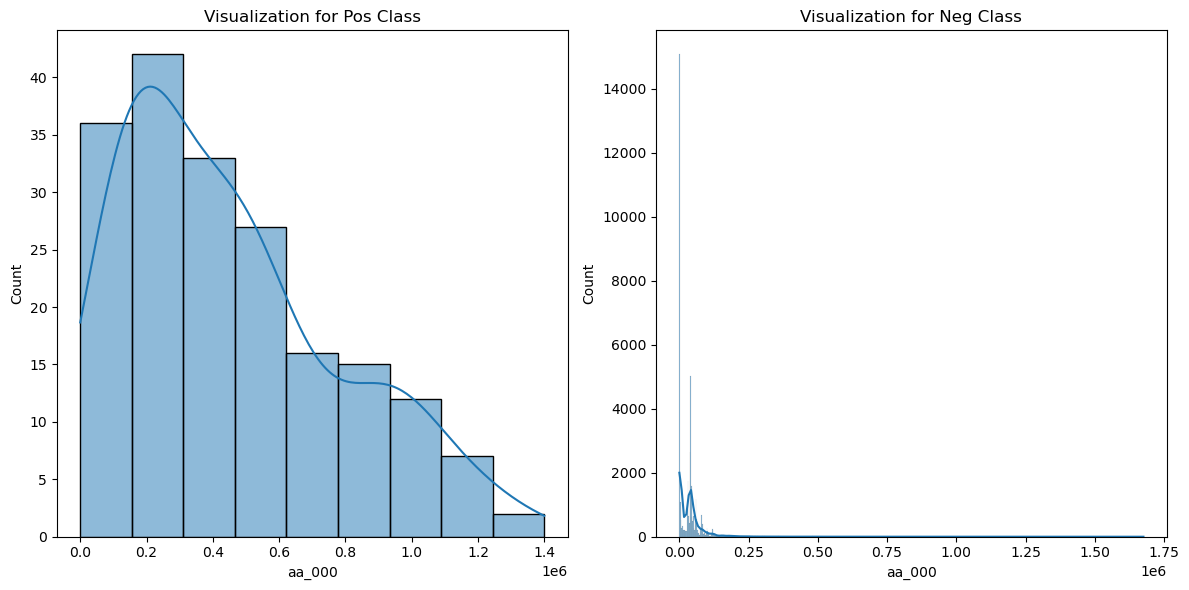

In [81]:
%matplotlib inline

df = aps_df_cleaned
# Filter the DataFrame for 'pos' class
df_pos = df[df['class'] == 'pos']

# Filter the DataFrame for 'neg' class
df_neg = df[df['class'] == 'neg']

# Create visualizations for the 'column_to_visualize' for both 'pos' and 'neg' classes
plt.figure(figsize=(12, 6))

# Visualization for 'pos' class
plt.subplot(1, 2, 1)
sns.histplot(data=df_pos, x='aa_000', kde=True)
plt.title('Visualization for Pos Class')

# Visualization for 'neg' class
plt.subplot(1, 2, 2)
sns.histplot(data=df_neg, x='aa_000', kde=True)
plt.title('Visualization for Neg Class')

plt.tight_layout()
plt.show()


Get pairplot for all the data points in the dataset to help us visualise and draw some conclusions about the data

c:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


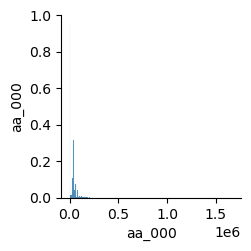

In [82]:
%matplotlib inline
sns.pairplot(aps_df_cleaned_no_class)

#### Use PCA to establish the optimal number of features needed for retaining 99.5% variance in the data

1. Import necessary libraries

In [86]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

2.  StandardScaler from sklearn.preprocessing to run fit transform on the data

In [83]:
scaler = StandardScaler()
df_without_class_scaled = scaler.fit_transform(aps_df_cleaned_no_class)

3. Create a PCA object and specify the desired explained variance ratio

In [84]:
pca = PCA(n_components=0.995)

4. Fit the PCA model to the data


In [85]:
df_pca = pca.fit_transform(df_without_class_scaled)

5. Get the number of components that retain 99.5% variance and print result

In [87]:
num_components = pca.n_components_

print("Minimum number of features for retaining 99.5% variance in the data:", num_components)

Minimum number of features for retaining 99.5% variance in the data: 109


#### Next, we roceed to implement PCA to dimensionally reduce the data to that number of features we already established (i.e. num_components). 

1. Initialize PCA with the desired number of components

In [88]:
pca = PCA(n_components=num_components)

2. Fit PCA on the data

In [89]:
pca.fit(aps_df_cleaned_no_class)

PCA(n_components=109)

3. Transform the data to reduce dimensions

In [90]:
aps_df_reduced = pca.transform(aps_df_cleaned_no_class)
aps_df_reduced

array([[ 1.66783545e+09, -4.81011420e+03,  1.49939077e+06, ...,
        -3.11428985e+03,  1.02215416e+03,  9.77231724e+01],
       [-4.62901094e+08, -4.52217380e+05, -7.02148333e+06, ...,
        -1.15445877e+00, -1.55731764e+03,  4.44098788e+02],
       [-4.62900530e+08, -4.45736346e+05, -1.07345901e+07, ...,
        -1.73826790e+01, -9.57713446e+00,  9.10019541e+01],
       ...,
       [ 1.66779472e+09,  1.23240631e+04, -8.22568949e+06, ...,
         1.23108371e+02,  2.48240798e+02, -8.96799957e+01],
       [ 1.66781717e+09, -2.72602592e+04,  3.64217066e+07, ...,
         3.65600974e+02, -6.72015471e+02,  7.31162841e+02],
       [-4.62951728e+08, -4.75626839e+05,  2.93108312e+07, ...,
         3.40517049e+01, -5.67902270e+02, -1.42637218e+02]])

4. Display our reduced data as a dataframe

In [91]:
pd.DataFrame(aps_df_reduced)

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
0,1.667835e+09,-4810.114203,1.499391e+06,1.294261e+07,4.733473e+06,-4.161075e+05,3.605949e+06,-5.108155e+05,-9.394290e+05,-3.325344e+05,...,-10095.034866,-4669.849582,-8256.885744,871.732506,-2220.603138,1313.096949,-1899.778898,-3114.289850,1022.154164,97.723172
1,-4.629011e+08,-452217.379825,-7.021483e+06,1.177081e+06,-1.376830e+06,-3.173920e+05,1.467968e+06,-9.882134e+05,-4.014991e+05,-1.907997e+05,...,-1310.794759,974.090599,401.525670,-292.574021,730.004616,-65.334607,501.120717,-1.154459,-1557.317640,444.098788
2,-4.629005e+08,-445736.345833,-1.073459e+07,-6.538546e+06,-3.598481e+05,3.380408e+05,-1.500425e+06,5.961721e+05,6.965225e+05,-2.307365e+05,...,267.937917,-27.114721,172.075917,38.538627,-62.108109,-52.269140,-30.807038,-17.382679,-9.577134,91.001954
3,-4.629249e+08,-467208.582433,1.355674e+07,-7.095098e+05,-1.321934e+06,1.961273e+05,3.548859e+06,4.737257e+05,-1.024833e+06,-1.834231e+06,...,16796.373301,4168.386896,2931.242220,-1156.355842,81.198819,-3444.055246,4549.930587,-1314.734178,5737.647738,-3703.505237
4,1.667825e+09,5119.963085,-5.001990e+06,1.940758e+06,2.077672e+06,2.917122e+05,2.184303e+05,4.533438e+05,-1.781713e+05,-6.044256e+05,...,3133.336451,-172.213235,-354.636260,-263.463244,-434.985050,-781.946293,-165.847635,1421.727446,2734.969483,-1658.254290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41656,-4.630028e+08,-515042.244913,7.517427e+07,-2.176541e+06,-2.502092e+06,-1.966052e+06,1.108215e+07,2.664341e+06,5.292775e+06,-1.306371e+06,...,-1333.677117,8060.120541,3026.791599,-38.554406,-1387.043337,-3606.483193,-5380.263878,653.962184,9539.933502,-6509.181355
41657,1.667796e+09,11307.592165,-6.859842e+06,-8.528970e+06,-5.499674e+06,2.076960e+05,-8.382431e+05,1.248264e+05,5.877122e+05,2.603603e+05,...,249.110671,-154.566162,373.359777,-146.050079,-69.552873,331.910569,484.598991,182.161466,529.095617,-106.165640
41658,1.667795e+09,12324.063064,-8.225689e+06,-8.641827e+06,-6.267146e+06,2.468106e+05,-8.287283e+05,6.475507e+04,6.503178e+05,3.573194e+05,...,-131.970080,122.134963,-47.850473,-252.261550,267.830160,-37.600380,45.703005,123.108371,248.240798,-89.679996
41659,1.667817e+09,-27260.259159,3.642171e+07,1.858868e+06,1.681344e+07,-1.800706e+06,2.134499e+06,1.075157e+06,2.498514e+05,1.208793e+06,...,-4743.452466,-2373.037813,-2091.791525,-2798.086456,-3074.859246,1160.043461,-448.802830,365.600974,-672.015471,731.162841


#### The curse of dimensionality
In data analysis, the "curse of dimensionality" refers to difficulties that are associated with datasets that have a large number of features. These features are also called dimensions. It seems understandable to think, that the more features/dimensions we have, the more data we can use and benefit from. But, that is not the case, as it seems the more features we have in a data set, the less information is received resulting in poor accuracy.


#### Findings
1. Some columns in datasets, contribute to null values more than any other column in the dataset, and simply dropping all null values results in a very thinned down dataset that is not a real representation of the whole dataset.
2. As part of cleaning the data, dropping rows with null values can help in making more accurate visualisations.
3. Negative class in the dataset had way more datapoints than the positive class.